**PARSING BIOGRID YEAST RAW DATA AND STORING UNIQUE PROTEINS IN EXCEL**

In [ ]:
# import pandas lib as pd
import pandas as pd
# only read specific columns from an excel file
df = pd.read_excel('/content/drive/MyDrive/biogrid test/BioGRID.xlsx')
#BioGrid Yeast 5616 unique proteins and 52833 interactions
column11=df['Column1'].tolist()
column22=df['Column2'].tolist()
list3 = column11 + column22
result=list(set(list3))
print(result)
df1 = pd.DataFrame()
#storing list into dataframe to write in excel
df1['Proteins'] = result
# Converting to excel
df1.to_excel('/content/drive/MyDrive/biogrid test/Unique_Proteins.xlsx', index = False)

['YHR124W', 'YKL049C', 'YMR158W', 'YKL045W', 'YDR003W-A', 'YJL104W', 'YPL151C', 'YBR258C', 'YOL056W', 'YMR015C', 'YIR005W', 'YIL096C', 'YNR029C', 'YDR132C', 'YDR003W', 'YCL016C', 'YER021W', 'YKR091W', 'YKL094W', 'YLL004W', 'YNL168C', 'YPR184W', 'YER145C', 'YKL028W', 'YHL003C', 'YDL069C', 'YDR428C', 'YBR161W', 'YDL122W', 'YNL030W', 'YLR467W', 'YGL091C', 'YDR034C-D', 'YJL122W', 'YDR158W', 'YOR213C', 'YPL032C', 'YPL258C', 'YLR335W', 'YEL048C', 'YLR204W', 'YNL064C', 'YHR215W', 'YPL146C', 'YJR112W', 'YDR251W', 'YHR165C', 'YIL014C-A', 'YGR294W', 'YML062C', 'YKR010C', 'YDL173W', 'YDL130W-A', 'YIL167W', 'YHL018W', 'YJR145C', 'YFR046C', 'YGL049C', 'YPR145W', 'YOL064C', 'YGR149W', 'YLR016C', 'YGR077C', 'YHR097C', 'YPR188C', 'YKL101W', 'YDL185W', 'YGR263C', 'YHR160C', 'TE(UUC)E1', 'YOR189W', 'YGR163W', 'YPL128C', 'YKR082W', 'YER120W', 'YMR167W', 'YBR085W', 'YPL049C', 'YMR312W', 'YBR025C', 'YJR077C', 'YGR166W', 'YOR195W', 'YDR319C', 'YPL124W', 'YER130C', 'YKR048C', 'YKL193C', 'YDR128W', 'YMR214W',

**Marking 1 for essential and 0 for non-essential in excel/csv**

In [ ]:
import numpy as np
import pandas as pd
#essential biogrid protein list
file1 = open("/content/drive/MyDrive/biogrid test/Essential.txt","r")
ess_prtn=file1.readlines()
ess_prtn1=[]
for i in ess_prtn:
    i=i.strip('\n')
    ess_prtn1.append(i)
#protein feature list with label column where 0 and 1 needs to inserted
df = pd.read_csv('/content/drive/MyDrive/biogrid test/biogrid-seq1.csv')
print(df)
df["Label"] = np.where(df["Proteins"].isin(ess_prtn1), "1", "0")
df.to_csv('/content/drive/MyDrive/biogrid test/Labelled biogrid-seq1.csv', index=False)

**Importing Packages**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import seaborn as sns
import numpy
import pandas
import h5py
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout

**Shuffling the Data**

In [ ]:
# random seed for reproducibility
numpy.random.seed(2)
# loading biogrid feature dataset
dataset = numpy.loadtxt("/content/drive/MyDrive/biogrid test/3.csv", delimiter=",")
# split into input (X) and output (Y) variables, splitting csv data
X = dataset[:, 0:71]
Y = dataset[:, 71]
#dataset = shuffle(dataset)
#x_train, x_validation, y_train, y_validation = train_test_split(X, Y, test_size=0.30, random_state=5)
sc_x = StandardScaler()
res=sc_x.fit(X)
X_standardized = res.transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_standardized, Y, test_size=0.20, random_state=1, shuffle=True)

In [ ]:
# Load libraries
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [ ]:
#function to evaluate all models
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [ ]:
from sklearn import tree
from sklearn import model_selection

#building XGBBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

# Evaluate Model
xgb_eval = evaluate_model(xgb, X_test, Y_test)

# Print result
print('XGBBoost Classifier')
print('Accuracy:', xgb_eval['acc'])
print('Precision:', xgb_eval['prec'])
print('Recall:', xgb_eval['rec'])
print('F1 Score:', xgb_eval['f1'])
print('Cohens Kappa Score:', xgb_eval['kappa'])
print('Area Under Curve:', xgb_eval['auc'])
print('Confusion Matrix:\n', xgb_eval['cm'])

#building AdaBoost Classifier
adab = AdaBoostClassifier(n_estimators=15, random_state=50)
adab.fit(X_train, Y_train)

# Evaluate Model
adab_eval = evaluate_model(adab, X_test, Y_test)

# Print result
print('AdaBoost Classifier')
print('Accuracy:', adab_eval['acc'])
print('Precision:', adab_eval['prec'])
print('Recall:', adab_eval['rec'])
print('F1 Score:', adab_eval['f1'])
print('Cohens Kappa Score:', adab_eval['kappa'])
print('Area Under Curve:', adab_eval['auc'])
print('Confusion Matrix:\n', adab_eval['cm'])

#building Logistic Regression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, Y_train)

# Evaluate Model
lr_eval = evaluate_model(lr, X_test, Y_test)

# Print result
print('Logistic Regression')
print('Accuracy:', lr_eval['acc'])
print('Precision:', lr_eval['prec'])
print('Recall:', lr_eval['rec'])
print('F1 Score:', lr_eval['f1'])
print('Cohens Kappa Score:', lr_eval['kappa'])
print('Area Under Curve:', lr_eval['auc'])
print('Confusion Matrix:\n', lr_eval['cm'])

#building support vector classification
svc = SVC(kernel='linear', C=1,gamma='auto',probability=True)
svc.fit(X_train, Y_train)

# Evaluate Model
svc_eval = evaluate_model(svc, X_test, Y_test)

# Print result
print('Support Vector Classification')
print('Accuracy:', svc_eval['acc'])
print('Precision:', svc_eval['prec'])
print('Recall:', svc_eval['rec'])
print('F1 Score:', svc_eval['f1'])
print('Cohens Kappa Score:', svc_eval['kappa'])
print('Area Under Curve:', svc_eval['auc'])
print('Confusion Matrix:\n', svc_eval['cm'])

# Building Decision Tree model
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, Y_train)

# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, Y_test)

# Print result
print('Decision Tree model')
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, Y_train)

# Evaluate Model
rf_eval = evaluate_model(rf, X_test, Y_test)

# Print result
print('Random Forest model')
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, Y_train)

# Evaluate Model
nb_eval = evaluate_model(nb, X_test, Y_test)

# Print result
print('Naive Bayes model')
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

XGBBoost Classifier
Accuracy: 0.6604166666666667
Precision: 0.6537102473498233
Recall: 0.74
F1 Score: 0.6941838649155722
Cohens Kappa Score: 0.31572503061046
Area Under Curve: 0.7358260869565217
Confusion Matrix:
 [[132  98]
 [ 65 185]]
AdaBoost Classifier
Accuracy: 0.6208333333333333
Precision: 0.6297709923664122
Recall: 0.66
F1 Score: 0.64453125
Cohens Kappa Score: 0.23875914952945276
Area Under Curve: 0.6745826086956521
Confusion Matrix:
 [[133  97]
 [ 85 165]]
Logistic Regression
Accuracy: 0.65625
Precision: 0.6568265682656826
Recall: 0.712
F1 Score: 0.6833013435700576
Cohens Kappa Score: 0.3087798917786698
Area Under Curve: 0.6981391304347826
Confusion Matrix:
 [[137  93]
 [ 72 178]]
Support Vector Classification
Accuracy: 0.6541666666666667
Precision: 0.6468531468531469
Recall: 0.74
F1 Score: 0.6902985074626865
Cohens Kappa Score: 0.30276513825691276
Area Under Curve: 0.7026260869565217
Confusion Matrix:
 [[129 101]
 [ 65 185]]
Decision Tree model
Accuracy: 0.59375
Precision: 0.6

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

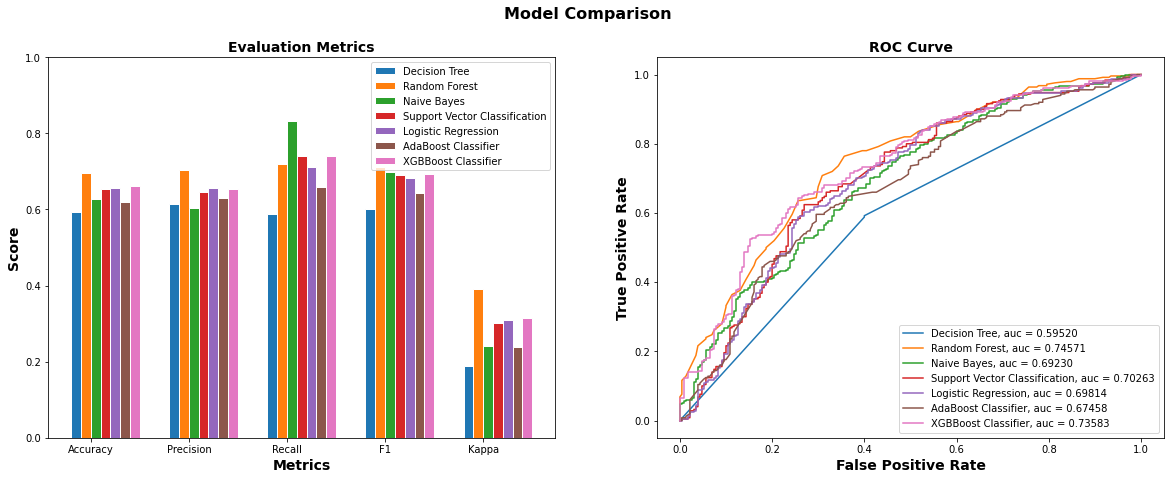

In [ ]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(20)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.1
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
svc_score = [svc_eval['acc'], svc_eval['prec'], svc_eval['rec'], svc_eval['f1'], svc_eval['kappa']]
lr_score = [lr_eval['acc'], lr_eval['prec'], lr_eval['rec'], lr_eval['f1'],lr_eval['kappa']]
adab_score = [adab_eval['acc'], adab_eval['prec'], adab_eval['rec'], adab_eval['f1'],adab_eval['kappa']]
xgb_score = [xgb_eval['acc'], xgb_eval['prec'], xgb_eval['rec'], xgb_eval['f1'], xgb_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r5 = [x + barWidth for x in r3]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r5, svc_score, width=barWidth, edgecolor='white', label='Support Vector Classification')
ax1.bar(r6, lr_score, width=barWidth, edgecolor='white', label='Logistic Regression')
ax1.bar(r7, adab_score, width=barWidth, edgecolor='white', label='AdaBoost Classifier')
ax1.bar(r8, xgb_score, width=barWidth, edgecolor='white', label='XGBBoost Classifier')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold',fontsize=14)
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold',fontsize=14)
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(svc_eval['fpr'], svc_eval['tpr'], label='Support Vector Classification, auc = {:0.5f}'.format(svc_eval['auc']))
ax2.plot(lr_eval['fpr'], lr_eval['tpr'], label='Logistic Regression, auc = {:0.5f}'.format(lr_eval['auc']))
ax2.plot(adab_eval['fpr'], adab_eval['tpr'], label='AdaBoost Classifier, auc = {:0.5f}'.format(adab_eval['auc']))
ax2.plot(xgb_eval['fpr'], xgb_eval['tpr'], label='XGBBoost Classifier, auc = {:0.5f}'.format(xgb_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold',fontsize=14)
ax2.set_ylabel('True Positive Rate', fontweight='bold',fontsize=14)

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
data = pd.read_excel('/content/drive/MyDrive/biogrid test/Predict.xlsx',header=None)
#data.drop(['Entry_Names'],axis = 1,inplace=True)
# Convert the DataFrame object into NumPy array otherwise you will not be able to impute
values = data.values

# Now impute it
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
Data = imputer.fit_transform(values)
scaler = MinMaxScaler(feature_range=(0, 1))
normalizedData = scaler.fit_transform(Data)
pd.DataFrame(normalizedData).to_csv('/content/drive/MyDrive/biogrid test/out1.csv')